In [5]:
import pylab
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from scipy import optimize
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

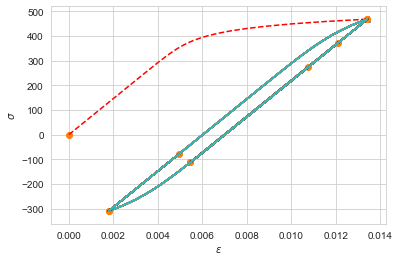

In [9]:
# Geometry

Kt = 2.15

# Material 

E = 73100.0
sig_fp = 927.0
b = -0.113
c = -0.713
eps_fp = 0.409
Hpr = 662.0
npr = 0.070


# Stress History

numPks = 9
S = np.array([0.0,315.0,45.0,270.0,45.0,225.0,-63.0,45.0,-63.0,315.0])
SigOr = np.array([0,0,0,0,1,0,1,0,0,0])

# Data Storage Arrays
sigPk = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
epsPk = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
delsig = [0.0]

# Handle first cycle

delS = S[1]-S[0]             
signS = delS/(abs(delS))                    # Update sign of loading
delS = abs(delS)
# find delsig using non-linear root finding
def f(sigma):                               #R-O Equation for initial load
        return ((1/Kt)*np.sqrt((sigma**2)+(sigma*E*((sigma/Hpr)**(1/npr))))-delS)  
delsig = optimize.brentq(f,delS, Kt*delS, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
delsig = delsig[0]
deleps = (delsig/E)+((delsig/Hpr)**(1/npr)) # R-O equation to find change in strain
sigPk[1] = sigPk[0] + signS*delsig          # Store peak stress and strain 
epsPk[1] = epsPk[0] + signS*deleps

# Loop over subsequent turning points 

for i in range (2,numPks+1):     # Get origin point, accounting for whether or not origin is previous point
    if SigOr[i] == 0:
        iOrigin = i-1            
    else:
        iOrigin = SigOr[i]
    delS = S[i] - S[iOrigin]
    signS = delS/(abs(delS))
    delS = abs(delS)
    def f(sigma1):               # solve for stress using factor of two expansion of R-O equation for subsequent loads
        return ((1/Kt)*np.sqrt(((sigma1/2)**2)+((sigma1*E)/2)*((sigma1/(2*Hpr))**(1/npr)))-(delS/2))
    delsig = optimize.brentq(f,delS, Kt*delS, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
    delsig = delsig[0]
    deleps = 2*((delsig/(2*E))+((delsig/(2*Hpr))**(1/npr)))
    sigPk[i] = sigPk[iOrigin] + signS*delsig
    epsPk[i] = epsPk[iOrigin] + signS*deleps
    
# Set up a plot

Npts = 50

# plot initial loading

stress = np.linspace(sigPk[0],sigPk[1],num = Npts)
#stress = abs(stress)
strain = (stress/E) + ((stress/Hpr)**(1/npr))
plt.plot(strain,stress,'r',linestyle='dashed')
plt.scatter(strain[49],stress[49],marker = '$A$')
    
# loop over subsequent turning points

for i in range(2,numPks+1):
    if SigOr[i] == 0:
        iOrigin = i - 1
    else:
        iOrigin = SigOr[i]
    delsig = sigPk[i] - sigPk[iOrigin]
    signS = delsig/(abs(delsig))
    delsig = abs(delsig)
    stress = np.linspace(0,delsig,Npts)
    strain = (stress/E) + 2*((stress/2/Hpr)**(1/npr)) 
    strain = epsPk[iOrigin] + (signS*strain)
    stress = sigPk[iOrigin] + (signS*stress)
    for j in range(0,Npts):
        plt.plot(strain,stress)

from matplotlib.pyplot import figure

sns.set_style('whitegrid')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\sigma$')
plt.scatter(epsPk,sigPk,marker = 'o')
plt.savefig('Final_2_hysteresisloop')
plt.show()



In [10]:
print(sigPk)

[0.0, 467.8114011062184, -112.13614952522784, 371.57247941377557, -112.13614952522784, 274.86214129112074, -309.4467209656587, -77.24672212323395, -309.4467209656587, 467.8114011062184]


In [11]:
print(epsPk)

[0.0, 0.013412503508863555, 0.005463762392262119, 0.01208197545107822, 0.005463762392262119, 0.010757903420869509, 0.001787907370040141, 0.004964377974110936, 0.001787907370040141, 0.013412503508863555]


In [13]:
SWT1 = 1.859255859
SWT2 = 1.229572918
SWT3 = 0.72757947
SWT4 = 2.719059303

def f(Nf1):
    return (((sig_fp**2)/E)*((2*Nf1)**(2*b)) + (sig_fp*eps_fp*((2*Nf1)**(b+c))))-SWT1
Nf1 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf1[0]

3397.4223119938574

In [14]:
def f(Nf2):
    return (((sig_fp**2)/E)*((2*Nf2)**(2*b)) + (sig_fp*eps_fp*((2*Nf2)**(b+c))))-SWT2
Nf2 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf2[0]

14559.417676222447

In [15]:
def f(Nf3):
    return (((sig_fp**2)/E)*((2*Nf3)**(2*b)) + (sig_fp*eps_fp*((2*Nf3)**(b+c))))-SWT3
Nf3 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf3[0]

120747.22284090934

In [17]:
def f(Nf4):
    return (((sig_fp**2)/E)*((2*Nf4)**(2*b)) + (sig_fp*eps_fp*((2*Nf4)**(b+c))))-SWT4
Nf4 = optimize.brentq(f,1, 10**9, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf4[0]

1103.5266926516347

In [4]:
len(sigPk)

10